In [2]:
###################################################
##
##                 Partie I
##   Analyse Empirique et Exploratoire  des Données
##
## 1- Lecture des données
## 2- Exploration des données
## 3- Extraction des données pour la première station
## 4- Trace les données pour cette station
##
####################################################

##### Lecture des données brutes #########
## Format csv (non compressé)
## Attention de bien modifier le chemin jusqu'au fichier en fonction de votre environnement
postesMF <- read.csv("../climdata/MFpostes.csv")
mydata <- read.csv("../climdata/MFdata.csv.gz")

In [3]:
head(mydata) ## affiche les premières ligne de l'objet mydata

,X,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,21473001,1961,1,1,2.4,4.8,3.1
2,2,21473001,1961,1,2,-1.2,7.8,15.2
3,3,21473001,1961,1,3,4.2,8.0,3.7
4,4,21473001,1961,1,4,2.2,7.3,5.6
5,5,21473001,1961,1,5,2.0,5.8,0.0
6,6,21473001,1961,1,6,-0.4,3.0,4.5


In [4]:
head(postesMF)

,X,NumStation,alti,lat,lon,LonLB2,LatLB2
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,21473001,219,47.26700,5.088,808161.5,2255559
2,2,25462001,831,46.90200,6.340,904877.3,2219107
3,3,39050001,535,46.78500,5.796,864050.9,2204148
4,4,39275004,1120,46.39167,5.960,878574.3,2161039
5,5,58062001,598,47.07000,3.934,721317.3,2231250
6,6,58160001,175,46.99800,3.112,658973.8,2222305


In [5]:
## Exploration des données
dim(mydata) ## dimension de l'objet
class(mydata) ## classe de l'objet
str(mydata) ## structure de l'objet avec le type des données contenues
tail(mydata) ## Dernières lignes de l'objet

[1] 180792      8

[1] "data.frame"

'data.frame':	180792 obs. of  8 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ NumPoste: int  21473001 21473001 21473001 21473001 21473001 21473001 21473001 21473001 21473001 21473001 ...
 $ Year    : int  1961 1961 1961 1961 1961 1961 1961 1961 1961 1961 ...
 $ Month   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Day     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Tn      : num  2.4 -1.2 4.2 2.2 2 -0.4 0.8 0.2 2.8 1.2 ...
 $ Tx      : num  4.8 7.8 8 7.3 5.8 3 7 6.6 7 4.1 ...
 $ RR      : num  3.1 15.2 3.7 5.6 0 4.5 1 1.6 0 1.4 ...


,X,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
180787,180787,39275004,2015,12,26,NA,NA,NA
180788,180788,39275004,2015,12,27,NA,NA,NA
180789,180789,39275004,2015,12,28,NA,NA,NA
180790,180790,39275004,2015,12,29,NA,NA,NA
180791,180791,39275004,2015,12,30,NA,NA,NA
180792,180792,39275004,2015,12,31,NA,NA,NA


In [6]:
## Combien de stations ?
nbrst <- unique(mydata$NumPoste)
length(nbrst) ## longueur du vecteur qui correspond au nombre des stations
nbrst ## affiche le contenu du vecteur

[1] 9

[1] 21473001 25462001 39050001 58062001 58160001 70006001 71105001 89387002
[9] 39275004

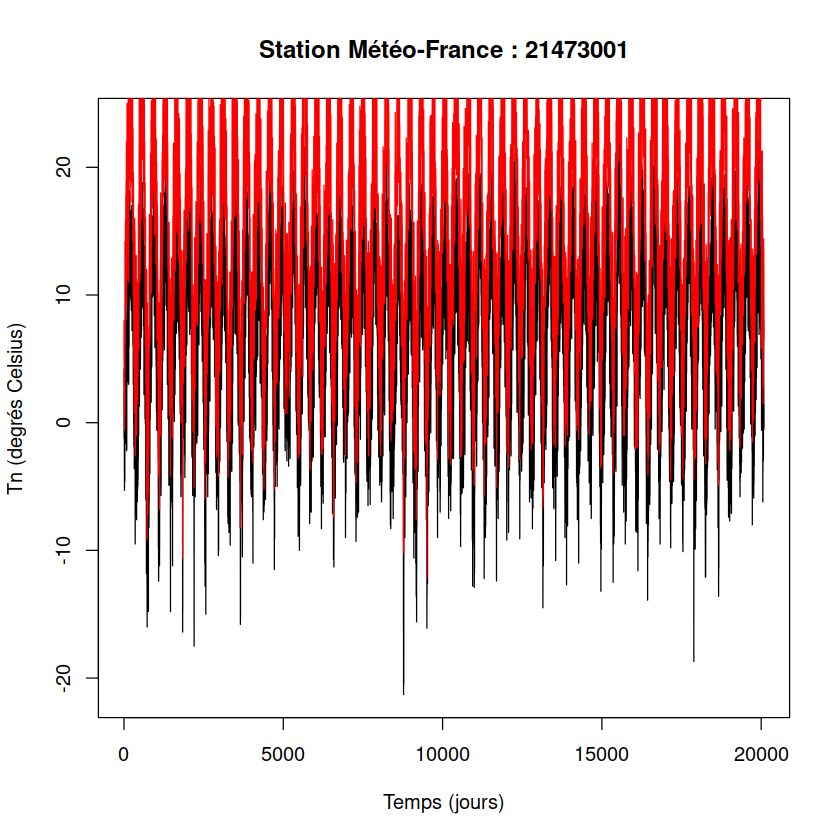

In [7]:
## Extraction des données de la première station
mydata.st <- subset(mydata,mydata$NumPoste==nbrst[1])
## Trace les températures minimales
##pdf(file="Station.pdf")
plot(mydata.st$Tn,type="l", xlab="Temps (jours)",ylab="Tn (degrés Celsius)",
     main= paste("Station Météo-France : ",nbrst[1],sep=""))
lines(mydata.st$Tx,col="red") ## ajout des Tx au graphiqur
##dev.off()

In [8]:
##########################################################
##  Création et manipulation de séries temporelles
##  1- Création d'un objet série temporelle
##  2- Calcul des moyennes et cumuls annuels
##
## package utilisé : xts
##########################################################
annees <- unique(mydata$Year) ## identification des années
resu <-c()
for(i in annees){ ## boucle sur les années et calcul de la moyenne annuelle des Tn
    #print(i)
    tmp <- subset(mydata.st$Tn, mydata.st$Year==i)
    print(mean(tmp)) ## affiche la moyenne annuelle des Tn toutes stations confondues
    resu <- c(resu,mean(tmp, na.rm=TRUE))
}

[1] 6.909315
[1] 5.363562
[1] 5.367123
[1] 6.387705
[1] 6.119726
[1] 6.896712
[1] 6.429315
[1] 6.177322
[1] 6.041644
[1] 6.134521
[1] 5.746575
[1] 5.996721
[1] 6.383836
[1] 7.081644
[1] 6.813151
[1] 6.882514
[1] 7.205753
[1] 6.165753
[1] 6.712877
[1] 6.029235
[1] 6.787945
[1] 7.113425
[1] 6.498904
[1] 5.752459
[1] 4.776712
[1] 5.520822
[1] 5.858082
[1] 6.845355
[1] 6.250685
[1] 6.529863
[1] 5.871781
[1] 6.450546
[1] 6.36137
[1] 7.82411
[1] 6.847123
[1] 5.809836
[1] 6.661644
[1] 6.225479
[1] 6.903014
[1] 7.115027
[1] 6.778082
[1] 7.236986
[1] 6.943562
[1] 6.532787
[1] 6.538356
[1] 7.001644
[1] 6.994521
[1] 6.531148
[1] 6.755068
[1] 5.998082
[1] 7.23863
[1] 6.820492
[1] 6.509315
[1] 7.610685
[1] 7.153973


In [9]:
class(resu)

[1] "numeric"

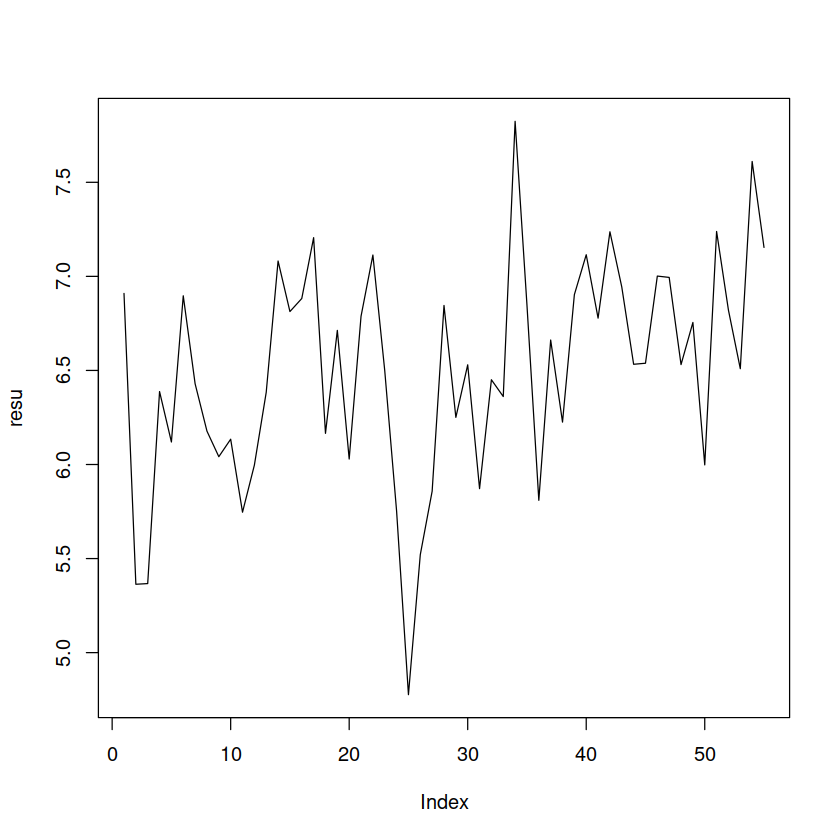

In [10]:
plot(resu, type="l") ## Trace l'évolution des Tn

In [11]:
## Charge le package xts
library(xts) ## require(xts)
## information et liste des fonctions du package xts 
help(package = "xts")
## Création d'un objet xts pour appliquer les fonctions du package
## on va utiliser ici la fonction xts -> Create Or Test For An xts Time-Series Object

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Documentation for package ‘xts’


		Information on package ‘xts’

Description:

Package:            xts
Type:               Package
Title:              eXtensible Time Series
Version:            0.12-0
Authors@R:          c( person(given=c("Jeffrey","A."), family="Ryan",
                    role=c("aut","cph")),
                    person(given=c("Joshua","M."), family="Ulrich",
                    role=c("cre","aut"),
                    email="josh.m.ulrich@gmail.com"),
                    person(given="Ross", family="Bennett", role="ctb"),
                    person(given="Corwin", family="Joy", role="ctb") )
Depends:            zoo (>= 1.7-12)
Imports:            methods
LinkingTo:          zoo
Suggests:           timeSeries, timeDate, tseries, chron, fts, tis,
                    RUnit
LazyLoad:           yes
Description:        Provide for uniform handling of R's different
                    time-based data classes by extending zoo,
                    maximizing native format i

In [12]:
?xts ## aide sur la fonction

xts {xts},R Documentation
x,an object containing the time series data
order.by,a corresponding vector of unique times/dates - must be of a known time-based class. See details.
frequency,numeric indicating frequency of order.by. See details.
unique,should index be checked for unique time-stamps?
tzone,time zone of series. This is ignored for Date indices
...,additional attributes to be added. See details.


In [13]:
## Création d'un vecteur date pour créer l'objet série temporelle
mydates <- paste(mydata.st$Year,"-",mydata.st$Month,"-",mydata.st$Day,
                 sep="")
class(mydates)
str(mydates)
mydates <- as.Date(mydates,"%Y-%m-%d")
str(mydates)
class(mydates)

[1] "character"

 chr [1:20088] "1961-1-1" "1961-1-2" "1961-1-3" "1961-1-4" "1961-1-5" ...
 Date[1:20088], format: "1961-01-01" "1961-01-02" "1961-01-03" "1961-01-04" "1961-01-05" ...


[1] "Date"

[1] "xts" "zoo"

An ‘xts’ object on 1961-01-01/2015-12-31 containing:
  Data: num [1:20088, 1:3] 2.4 -1.2 4.2 2.2 2 -0.4 0.8 0.2 2.8 1.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "Tn" "Tx" "RR"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


Warning message:
“timezone of object (UTC) is different than current timezone ().”


                 Tn       Tx
1961-12-31 6.909315 16.30658
1962-12-31 5.363562 14.55808
1963-12-31 5.367123 14.06027
1964-12-31 6.387705 15.16366
1965-12-31 6.119726 14.17781
1966-12-31 6.896712 15.09507

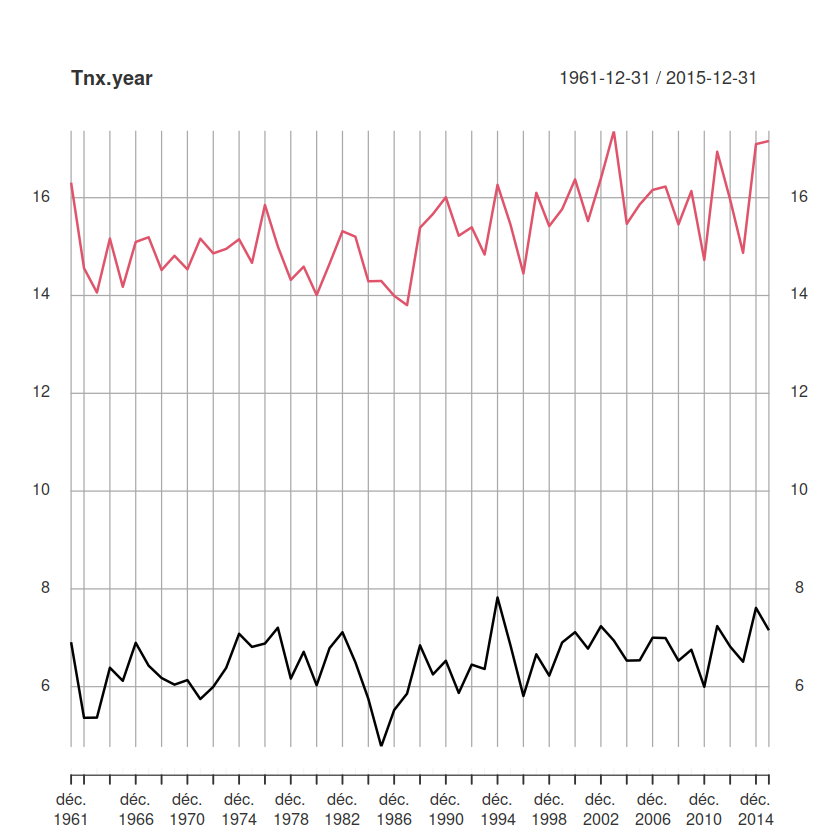

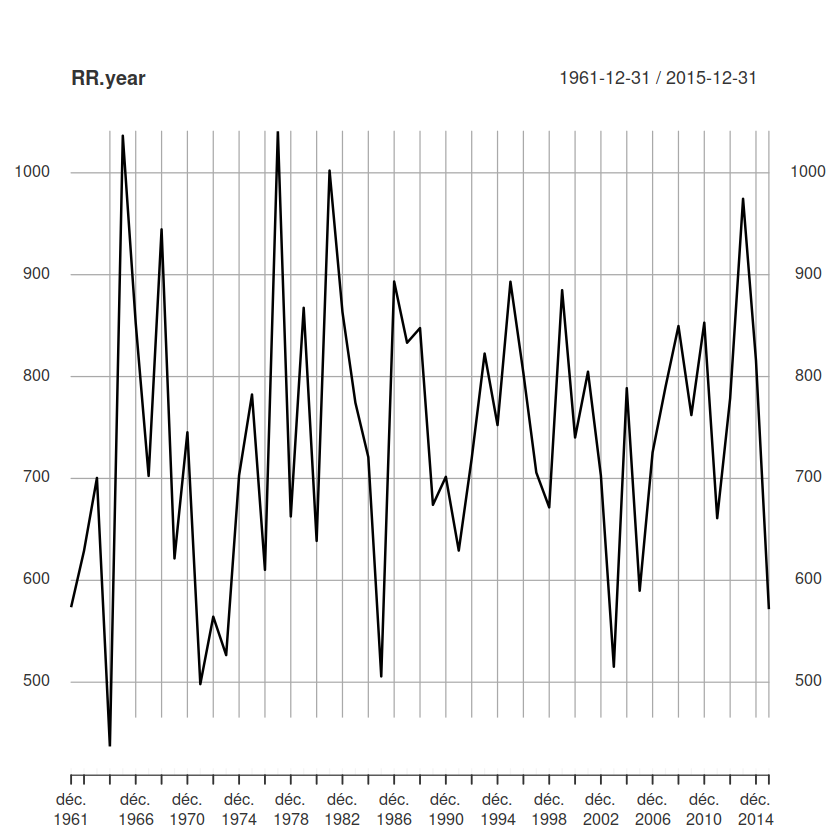

In [15]:
## Création de l'objet séries temporelles xts pour Tn, Tx et RR
myxts.st <- xts(mydata.st[,c("Tn","Tx","RR")], order.by=mydates)
class(myxts.st)
str(myxts.st)

## Application de fonction sur les périodes calendaires e.g. année
## pour avoir de l'aide sur cette fonction tapez ?apply.yearly dans votre console RStudio
## Calcul des moyennes annuelles pour Tn et Tx
Tnx.year <- apply.yearly(myxts.st[,1:2], mean) 
head(Tnx.year)
## Trace l'évolution inter-annuelle des Tn et des Tx
plot(Tnx.year)
## Calcul des cumuls annuels pour les précipitations
RR.year <- apply.yearly(myxts.st[,3],sum) 
plot(RR.year)

In [ ]:
## Exercice #1 refaire cela pour les autres stations

## Observez vous la même évolution entre les stations ?
## Les Tn et Tx montrent-elles la même évolution depuis 1961 ?


####################################################
####################################################
##
## Partie II : analyse de séries
##
## 1- détection de rupture (test de Pettitt)
## 2- détection de tendance (test de Mann-Kendall)
##
## programmation R + package : trend
#####################################################